In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

load data

In [4]:
# source_name = 'qu_solar_PV_Power00-19.csv'
d1 = pd.read_csv('./results_df/prevb_sharw.csv', index_col=0) # Wind and solar share electricity production%
d2 = pd.read_csv('./results_df/preva_inten.csv', index_col=0) # Energy intensity level of primary energy (MJ/2011 USD PPP)
df = pd.merge(d1, d2)

FileNotFoundError: [Errno 2] No such file or directory: './results_df/prevb_sharw.csv'

In [64]:
df

,Country,Years,Wind and solar share electricity production%,Energy intensity level of primary energy (MJ/2011 USD PPP) [6.1_PRIMARY.ENERGY.INTENSITY]
0,Germany,2000,1.63,4.635294
1,United States,2000,0.52,7.335371
2,China,2000,0.06,10.233051
3,India,2000,0.30,6.949595
4,Germany,2001,1.80,4.694757
...,...,...,...,...
59,India,2014,3.27,4.960149
60,Germany,2015,18.53,3.603094
61,United States,2015,5.86,5.408393
62,China,2015,3.94,6.690070


In [72]:
df['Years'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015])

In [73]:
df['Country'].unique()

array(['Germany', 'United States', 'China', 'India'], dtype=object)

In [74]:
df.columns

Index(['Country', 'Years', 'Wind and solar share electricity production%',
       'Energy intensity level of primary energy (MJ/2011 USD PPP) [6.1_PRIMARY.ENERGY.INTENSITY]'],
      dtype='object')

In [77]:
df=df.rename(columns={'Energy intensity level of primary energy (MJ/2011 USD PPP) [6.1_PRIMARY.ENERGY.INTENSITY]':'Energy intensity level of primary energy (MJ/2011 USD PPP)'})
#df=df.rename(columns={'Total electricity output (GWh) [4.1.1_TOTAL.ELECTRICITY.OUTPUT]':'Total electricity output (GWh)'})

In [78]:
df

,Country,Years,Wind and solar share electricity production%,Energy intensity level of primary energy (MJ/2011 USD PPP)
0,Germany,2000,1.63,4.635294
1,United States,2000,0.52,7.335371
2,China,2000,0.06,10.233051
3,India,2000,0.30,6.949595
4,Germany,2001,1.80,4.694757
...,...,...,...,...
59,India,2014,3.27,4.960149
60,Germany,2015,18.53,3.603094
61,United States,2015,5.86,5.408393
62,China,2015,3.94,6.690070


build plots for the countries we research

In [79]:
df.columns

Index(['Country', 'Years', 'Wind and solar share electricity production%',
       'Energy intensity level of primary energy (MJ/2011 USD PPP)'],
      dtype='object')

In [80]:
dfg = df.groupby('Years').mean()
dfg = dfg.reset_index()

In [81]:
dfg['Years']

0     2000
1     2001
2     2002
3     2003
4     2004
5     2005
6     2006
7     2007
8     2008
9     2009
10    2010
11    2011
12    2012
13    2013
14    2014
15    2015
Name: Years, dtype: int64

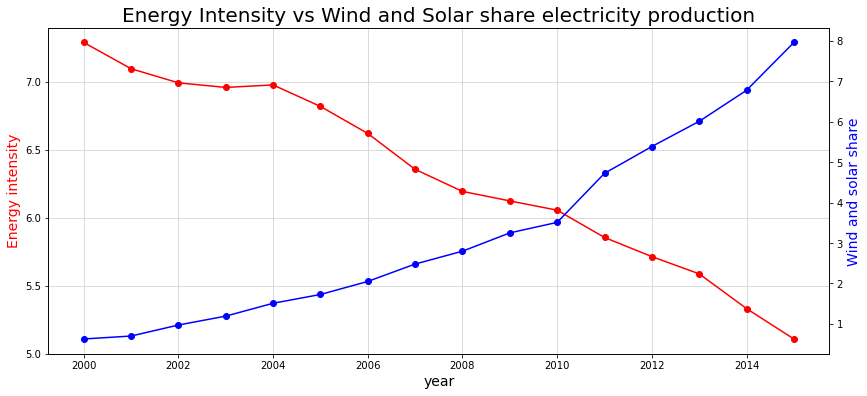

In [82]:

# create figure and axis objects with subplots()
fig,ax = plt.pyplot.subplots(1,1, figsize=(14,6))
ax.grid(color='lightgrey')

# make a plot
ax.plot(dfg['Years'], dfg['Energy intensity level of primary energy (MJ/2011 USD PPP)'], color="red", marker="o")
# set x-axis label
ax.set_xlabel("year",fontsize=14)
# set y-axis label
ax.set_ylabel("Energy intensity",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(dfg['Years'], dfg['Wind and solar share electricity production%'],color="blue",marker="o")
ax2.set_ylabel("Wind and solar share",color="blue",fontsize=14)
ax.set_title('Energy Intensity vs Wind and Solar share electricity production', size = 20)

plt.pyplot.show()

# save the plot as a file
fig.savefig('Energy Intensity vs Wind and Solar share electricity production.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')